In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("../data/technologies.csv")
df

,Title,City,Salary,Technologies
0,Senior Python Engineer (Django),remote,$3000–4000,"Python, Linux, Js, Docker"
1,Senior Python Engineer,remote,NaN,"Flask, Python, Docker, Api"
2,"Lead Full Stack Python(Flask)/React (80% BE, 2...",remote,NaN,"Python, Fullstack"
3,Senior software engineer (scraping),remote,NaN,"Python, Aws, Microservices"
4,Customer Support Engineer,remote,NaN,"Python, Sql"
...,...,...,...,...
133,Python Developer у Стартап,NaN,$1000–2500,"Python, Api"
134,Senior Full Stack Developer (Python/Django),remote,NaN,"Python, Api, Fastapi"
135,Python Developer/Part-time Mentor,remote,NaN,Python
136,Python Developer,"Мальта, remote",$2500–4500,"Api, Python, Sql, Django, Nosql"


# Get technologies diagram


## Top 10 technologies

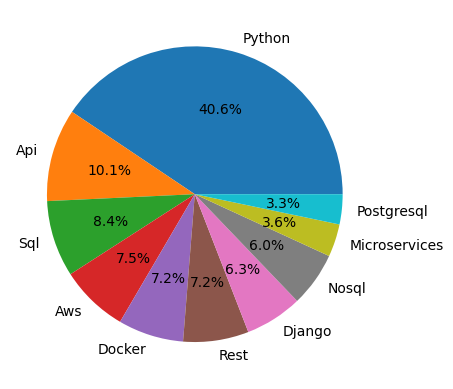

In [87]:
all_technologies = df["Technologies"].str.split(", ").sum()
technology_counts = pd.Series(all_technologies).value_counts()
top_10 = technology_counts[:10]
plt.pie(top_10, labels=top_10.index, autopct="%1.1f%%")
plt.savefig("../data/top_10_technologies_stats.png", format="png", dpi=300)
plt.show()

## All technologies diagram

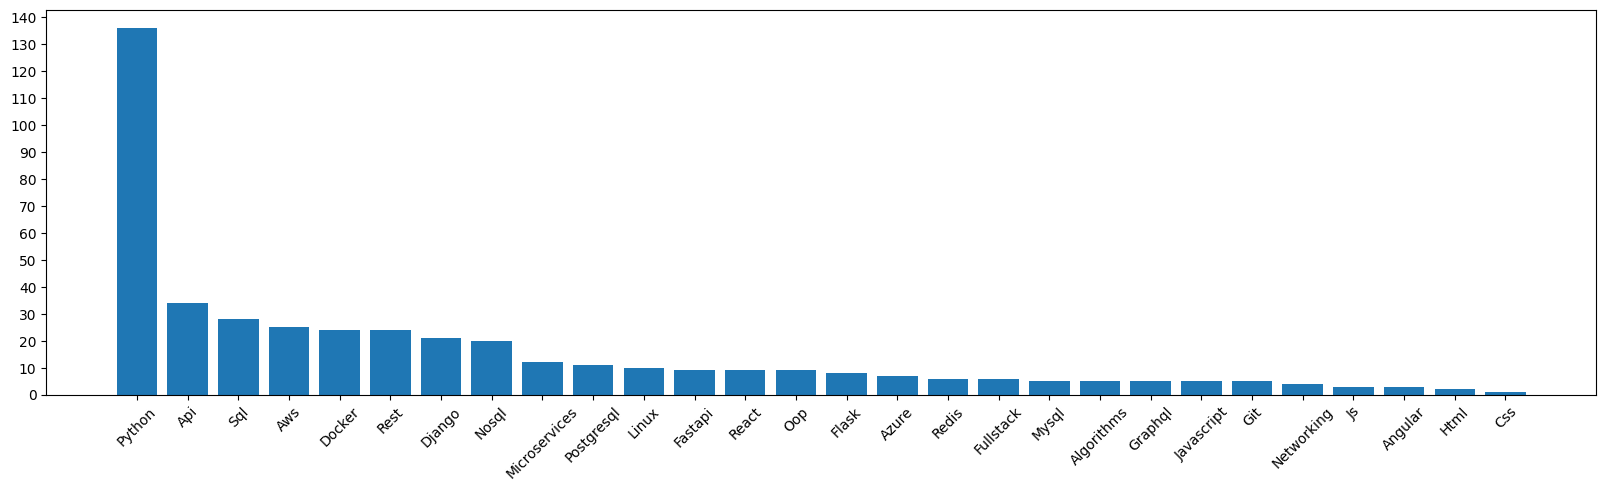

In [88]:
plt.figure(figsize=(20, 5))
plt.bar(technology_counts.index, technology_counts.values)
plt.yticks(range(0, 150, 10))
plt.xticks(rotation=45)
plt.savefig("../data/all_technologies_stats.png", format="png", dpi=300)
plt.show()

# Salary by city

## Min salary by city

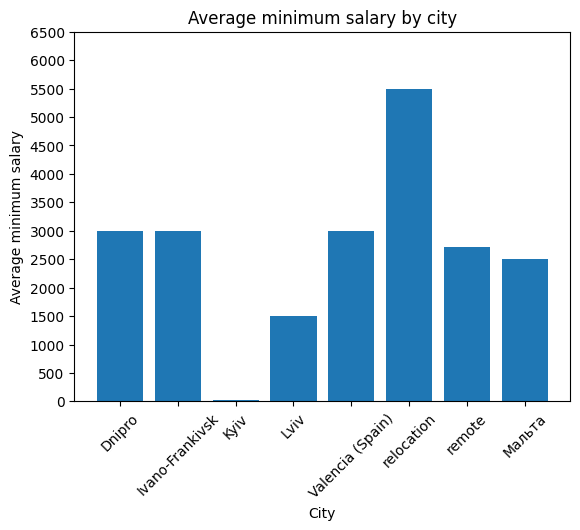

In [89]:
df_with_salaries = df.dropna(subset=["Salary"]).copy()
df_with_salaries["Min_Salary"] = df_with_salaries['Salary'].str.split("–").str[0].str.replace("$", "").astype(int)
df_with_salaries = df_with_salaries.assign(City=df["City"].str.split(",")).explode("City")
df_with_salaries["City"] = df_with_salaries["City"].str.strip()
city_min_salary_mean = df_with_salaries.groupby("City")["Min_Salary"].mean()
plt.bar(city_min_salary_mean.index, city_min_salary_mean.values)
plt.xticks(rotation=45)
plt.yticks(range(0, 7000, 500))
plt.title("Average minimum salary by city")
plt.xlabel("City")
plt.ylabel("Average minimum salary")
plt.savefig("../data/min_salary_by_city.png", format="png", dpi=300)
plt.show()

## Max salary by city

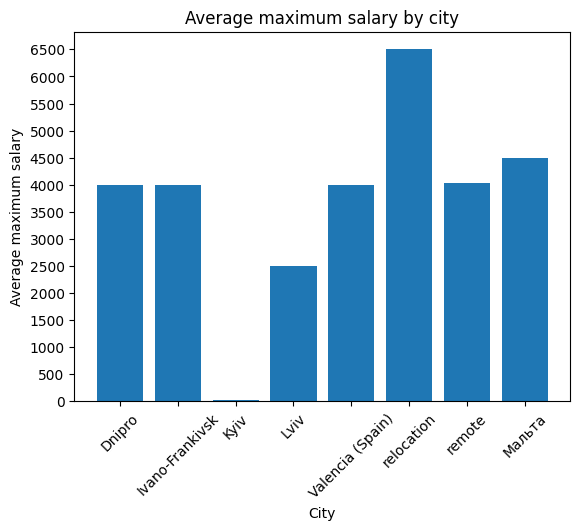

In [90]:
df_with_salaries["Max_Salary"] = df_with_salaries['Salary'].str.split("–").str[1]
df_with_salaries.fillna({"Max_Salary": df_with_salaries["Min_Salary"]}, inplace=True)
df_with_salaries["Max_Salary"] = df_with_salaries["Max_Salary"].astype(int)
city_max_salary_mean = df_with_salaries.groupby("City")["Max_Salary"].mean()
plt.bar(city_max_salary_mean.index, city_max_salary_mean.values)
plt.xticks(rotation=45)
plt.yticks(range(0, 7000, 500))
plt.title("Average maximum salary by city")
plt.xlabel("City")
plt.ylabel("Average maximum salary")
plt.savefig("../data/max_salary_by_city.png", format="png", dpi=300)
plt.show()